## 康威生命游戏

1. 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
1. 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
1. 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
1. 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）

Ref:

康威生命游戏: [中文](https://zh.wikipedia.org/wiki/%E5%BA%B7%E5%A8%81%E7%94%9F%E5%91%BD%E6%B8%B8%E6%88%8F), [英文](https://en.wikipedia.org/wiki/The_Game_of_Life)

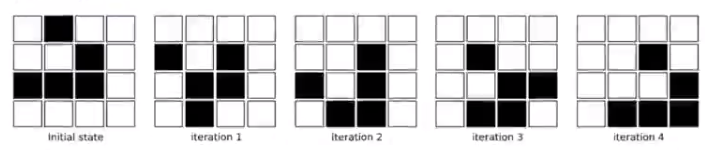

## Python：计算每个neighbor，按规则更新

In [8]:
def compute_neighbours(Z):
    shape = len(Z), len(Z[0])
    N  = [[0,]*(shape[0]) for i in range(shape[1])]
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N


def iterate(Z):
    N = compute_neighbours(Z)
    shape = len(Z), len(Z[0])
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [9]:
# 起始状态
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

# 计算neighbor需要在边界加0
Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1

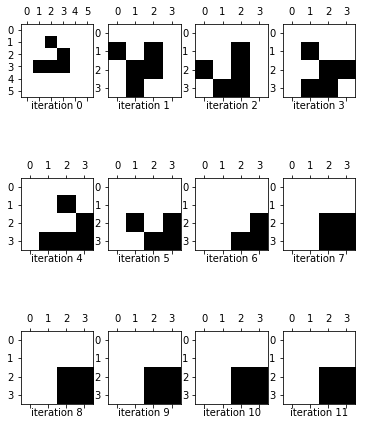

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(3, 4, figsize=(6, 8))

axes = axes.flatten()

axes[0].matshow(Z, cmap="Greys")
axes[0].set_xlabel("iteration %s" % 0)

for i in range(1,12):
    Z = iterate(Z)
    axes[i].matshow(np.array(Z)[1:-1, 1:-1], cmap="Greys")
    axes[i].set_xlabel("iteration %s" % i)

## Numpy加速：



In [22]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1

In [23]:
def iterate_np(Z):
    N = np.zeros_like(Z, dtype=int)
    # 直接将每个位置相同方向的neighbor放在一起，e.g Z[ :-2, :-2]为左上元素集合矩阵
    N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    # 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
    birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)

    # 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
    survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
    
    # 死亡还是存活只有这两种可能
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    
    return Z

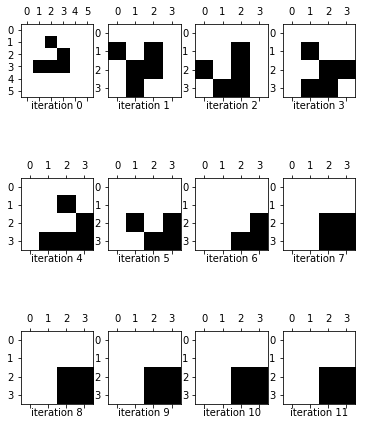

In [24]:
fig, axes = plt.subplots(3, 4, figsize=(6, 8))

axes = axes.flatten()

axes[0].matshow(Z, cmap="Greys")
axes[0].set_xlabel("iteration %s" % 0)



for i in range(1,12):
    Z = iterate_np(Z)
    axes[i].matshow(np.array(Z)[1:-1, 1:-1], cmap="Greys")
    axes[i].set_xlabel("iteration %s" % i)